In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import statistics as sts

In [2]:
dados = pd.read_csv("Churn.csv", sep=";")
dados.head(5)

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [3]:
dados.shape

(999, 12)

In [4]:
dados.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartaoCredito", "Ativo", "Salario", "Saiu"]
dados.head(5)

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [5]:
estado = dados.groupby(["Estado"]).size()
estado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot: xlabel='Estado'>

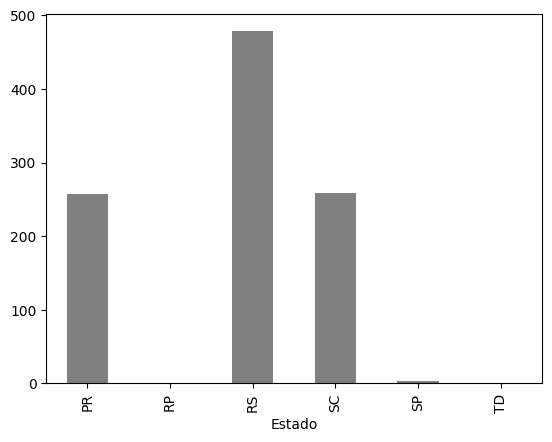

In [6]:
estado.plot.bar(color="gray")

In [7]:
dados.isna().count()

Id                  999
Score               999
Estado              999
Genero              999
Idade               999
Patrimonio          999
Saldo               999
Produtos            999
TemCartaoCredito    999
Ativo               999
Salario             999
Saiu                999
dtype: int64

In [8]:
salario = dados["Salario"]
salario.describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [9]:
sal = np.array(salario)

In [10]:
genero = dados.groupby(["Genero"]).size()
genero

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [11]:
dados["Score"].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

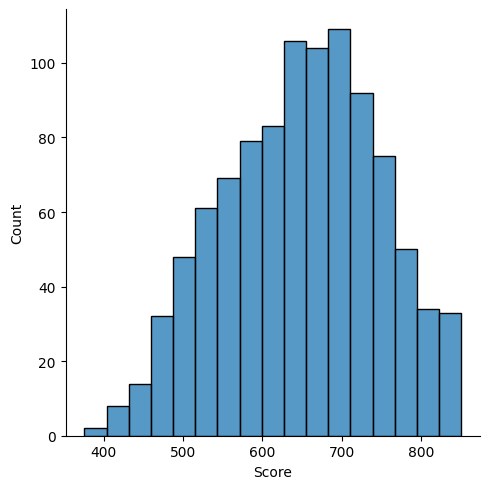

In [12]:
sb.displot(dados["Score"])

In [13]:
dados["Idade"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

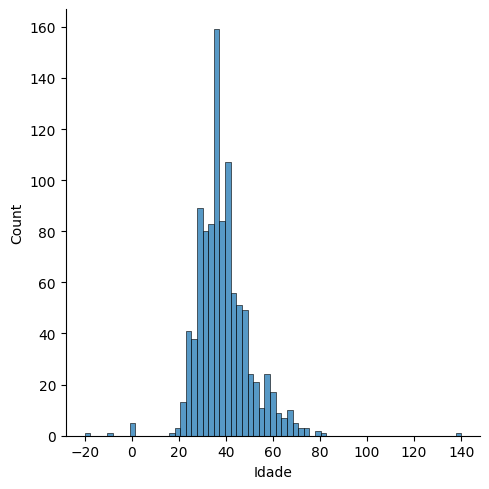

In [14]:
sb.displot(dados["Idade"])

<AxesSubplot: >

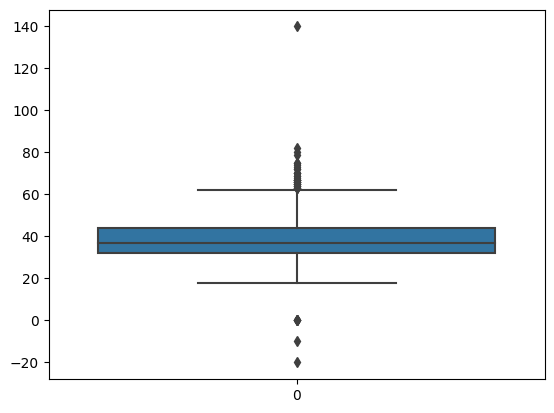

In [15]:
sb.boxplot(dados["Idade"])

In [16]:
dados["Saldo"].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

<AxesSubplot: >

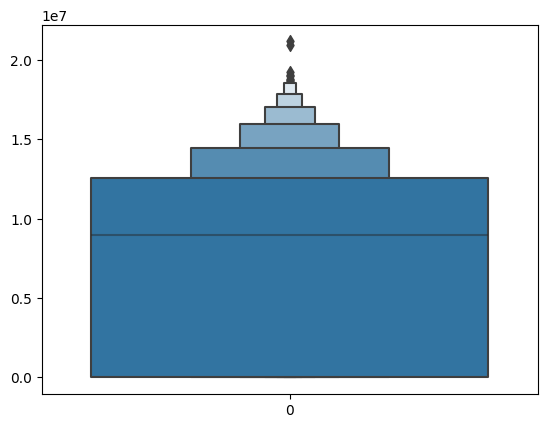

In [17]:
sb.boxenplot(dados["Saldo"])

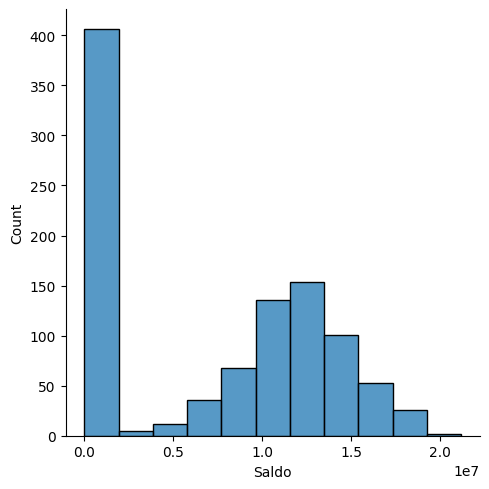

In [18]:
sb.displot(dados["Saldo"])

In [19]:
dados["Salario"].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

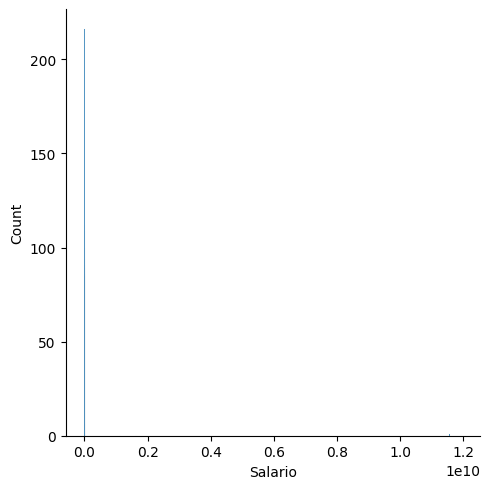

In [20]:
sb.displot(dados["Salario"])

<AxesSubplot: xlabel='Salario', ylabel='Count'>

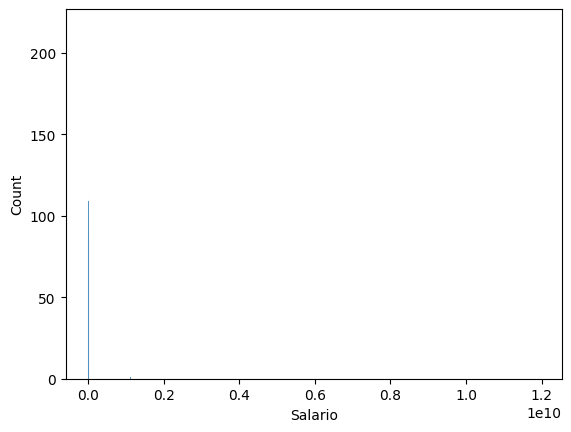

In [21]:
sb.histplot(dados["Salario"])

<AxesSubplot: >

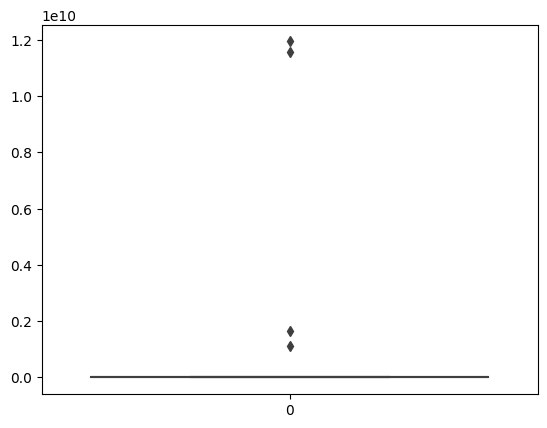

In [22]:
sb.boxplot(dados["Salario"])

In [23]:
dados.isnull().sum()

Id                  0
Score               0
Estado              0
Genero              8
Idade               0
Patrimonio          0
Saldo               0
Produtos            0
TemCartaoCredito    0
Ativo               0
Salario             7
Saiu                0
dtype: int64

In [24]:
dados["Salario"].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [25]:
mediana = sts.median(dados["Salario"])
mediana

70518.0

In [26]:
dados["Salario"].fillna(mediana, inplace=True)

In [27]:
dados["Salario"].isnull().sum()

0

In [28]:
agrupado = dados.groupby(["Genero"]).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [29]:
dados["Genero"].isnull().sum()

8

In [30]:
dados.isnull().sum()

Id                  0
Score               0
Estado              0
Genero              8
Idade               0
Patrimonio          0
Saldo               0
Produtos            0
TemCartaoCredito    0
Ativo               0
Salario             0
Saiu                0
dtype: int64

In [31]:
dados["Genero"].fillna("Masculino", inplace=True)

In [32]:
dados["Genero"].isnull().sum()

0

In [33]:
agrupado = dados.groupby(["Genero"]).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    529
dtype: int64

In [34]:
dados.loc[dados["Genero"] == "M", "Genero"] = "Masculino"
dados.loc[dados["Genero"].isin(["Fem", "F"]), "Genero"] = "Feminino"

In [35]:
agrupado = dados.groupby(["Genero"]).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

<AxesSubplot: xlabel='Genero'>

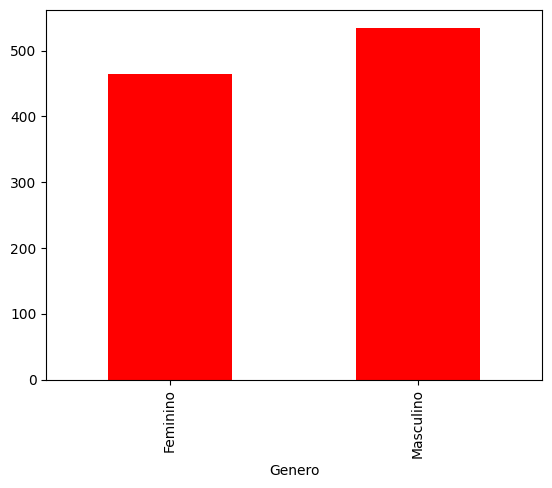

In [36]:
agrupado.plot.bar(color="red")

In [37]:
dados["Idade"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [38]:
dados.loc[(dados["Idade"] < 0) | (dados["Idade"] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [39]:
mediana = sts.median(dados["Idade"])
mediana

37

In [40]:
dados.loc[(dados["Idade"] < 0) | (dados["Idade"] > 120), "Idade"] = mediana

In [42]:
dados.loc[(dados["Idade"] < 0) | (dados["Idade"] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu


<AxesSubplot: xlabel='Idade', ylabel='Count'>

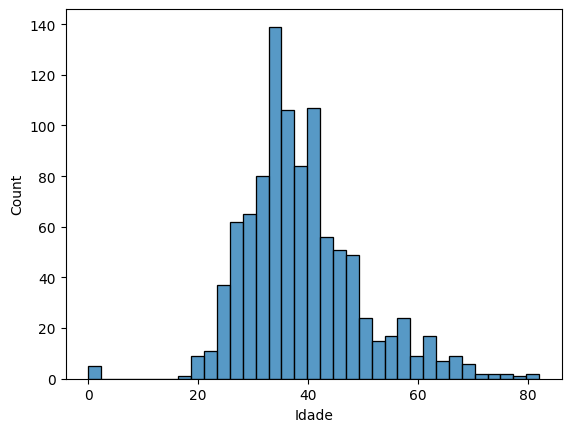

In [43]:
sb.histplot(dados["Idade"])

In [44]:
dados.loc[dados["Idade"] == 0]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
851,853,667,PR,Feminino,0,1,9713392,2,0,0,11331677.0,1
887,889,585,RS,Masculino,0,2,0,2,1,1,1865777.0,0
930,932,661,SC,Masculino,0,6,13262898,1,0,0,3881267.0,0
931,933,564,PR,Masculino,0,9,10352275,2,1,1,3433821.0,0
947,949,715,RS,Feminino,0,5,11859041,1,1,1,568417.0,1


In [47]:
estados = dados.groupby(["Estado"]).size()
estados

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

Genero: OK  
Idade: OK  
Salario: OK  
Estado: Alterar

In [48]:
dados["Estado"].describe()

count     999
unique      6
top        RS
freq      478
Name: Estado, dtype: object

In [49]:
dados["Estado"].isnull().sum()

0

In [50]:
dados.loc[dados["Estado"].isin(["RP", "SP", "TD"]), "Estado"] = "RS"

In [51]:
estados = dados.groupby(["Estado"]).size()
estados

Estado
PR    257
RS    484
SC    258
dtype: int64

In [52]:
dados[dados.duplicated(["Id"], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [53]:
dados.drop_duplicates(subset="Id", keep="first", inplace=True)

In [54]:
dados[dados.duplicated(["Id"], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu


<AxesSubplot: >

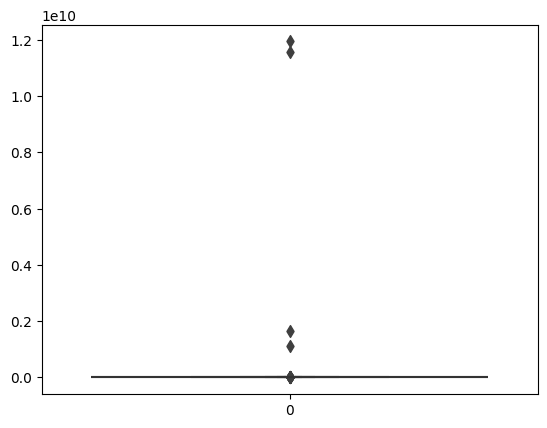

In [55]:
sb.boxenplot(dados["Salario"])

In [56]:
desvio = sts.stdev(dados["Salario"])
desvio

528988918.4679201

In [58]:
dados.loc[dados["Salario"] >= 2 * desvio]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [59]:
mediana = sts.median(dados["Salario"])
mediana

8637195.5

In [60]:
dados.loc[dados["Salario"] >= 2 * desvio, "Salario"] = mediana

In [61]:
dados.loc[dados["Salario"] >= 2 * desvio]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu


In [62]:
dados.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [63]:
dados.shape

(998, 12)